# Customizing plots

Matplotlib's strength lies in its customizability. Basic plots can be informative, but true clarity comes through adjustments. Tailoring colors, labels, and grids transforms the data from a report to a more concise and informative version of itself. Highlighting trends and customizing for your audience ensures everyone can grasp the insights.

- [Changing Overall Status](#changing-overall-styles)
- [Changing Specific elements of plot](#changing-specific-elements-of-plot)
- [Customizing cholesterol plot](#customizing-cholesterol-plot)


In [24]:
# Importing packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Changing overall styles

Matplotlib offers a range of built-in styles that go beyond individual plot element customization. These styles, applied with `plt.style.use()`, can drastically change the overall look and feel your plots. THis is particularly useful if you have a preferred aesthetic or need consistency across multiple plots.


In [26]:
# Checking all available styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [27]:
# Changing styles
plt.style.use('seaborn-v0_8')

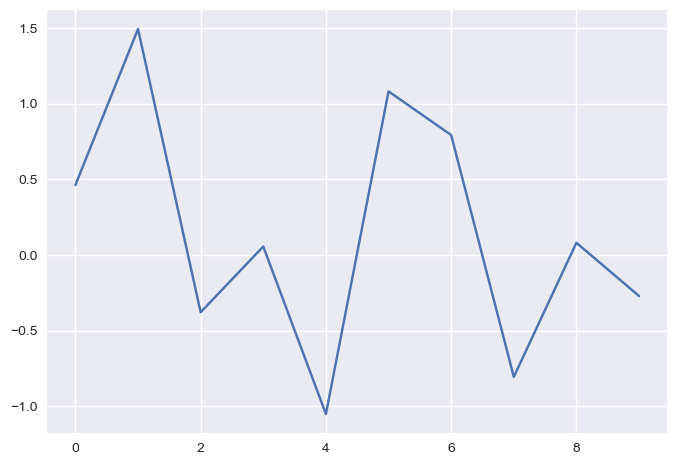

In [28]:
# Plotting random data
plt.plot(np.random.randn(10))

## Changing specific elements of plot

Pandas builds upon Matplotlib's foundation, providing a more user-friendly approach to plot customization, While Matplotlib offers granular control over every plot element, pandas streamlines common adjustments. Setting titles (`title`) and axis labels (`xlabel` and `ylabel`) within pandas plotting functions. Legends are automatically generated for plots with multiple series, but you can further customize their appearance using Matplotlib's `plt.legend()` function after calling the plot with pandas.

For adding horizontal lines (`axhline`) pandas doesn't offer a built=in function. However, you can seamlessly leverage Matplotlib's `axhline()` function directly on the Matplotlib axis object returned by pandas' plotting methods. This tight integration allows you to switch between pandas' convenient methods and Matplotlib's full functionality for a tailored customization experience.


In [29]:
# Creating random data
x = np.random.randn(10, 4)

df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-0.298285,1.412903,1.264877,1.536087
1,1.461986,1.073543,-1.175050,0.522721
2,1.473230,-1.105458,-1.330745,-1.489377
3,0.826041,-1.610852,1.218252,-0.026205
4,-0.664604,-0.704342,-0.188902,-0.381498
5,-0.717914,-1.071140,0.523136,-1.320425
6,-0.055050,-0.883083,-0.650811,-1.006162
7,0.241807,0.709862,-1.078981,-1.020223
8,0.414541,-0.046834,-0.764779,0.330444
9,-0.523074,0.178945,-0.654244,-1.516852


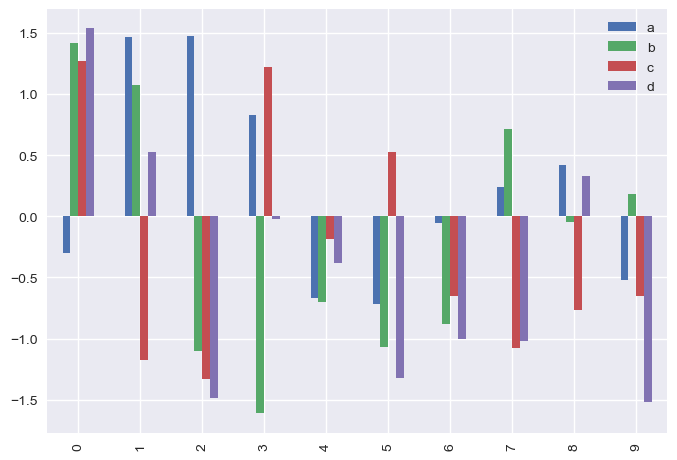

In [30]:
# Plotting data
ax = df.plot.bar()

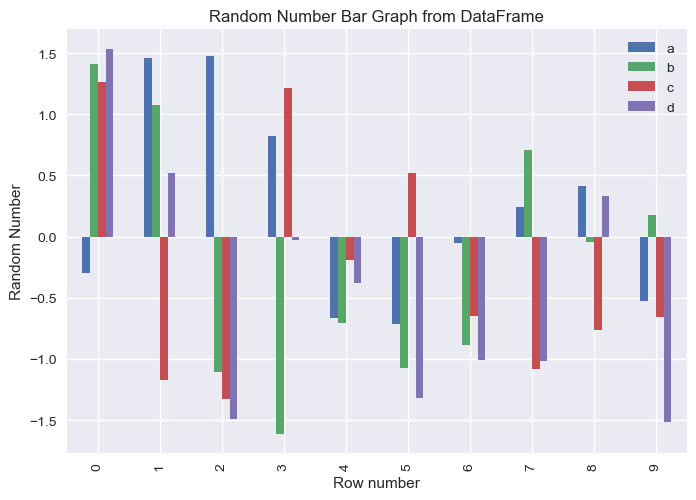

In [31]:
# Customizing plot with the set() method
ax = df.plot.bar()

# Setting some elements of the plot
ax.set(
    title='Random Number Bar Graph from DataFrame',
    xlabel='Row number',
    ylabel='Random Number',
)

# Make the legend visible
ax.legend().set_visible(True)

## Customizing cholesterol plot


In [ ]:
# Creating Data
heart_disease = pd.read_csv('datasets/heart-disease.csv')
over_50 = heart_disease[heart_disease['age'] > 50]

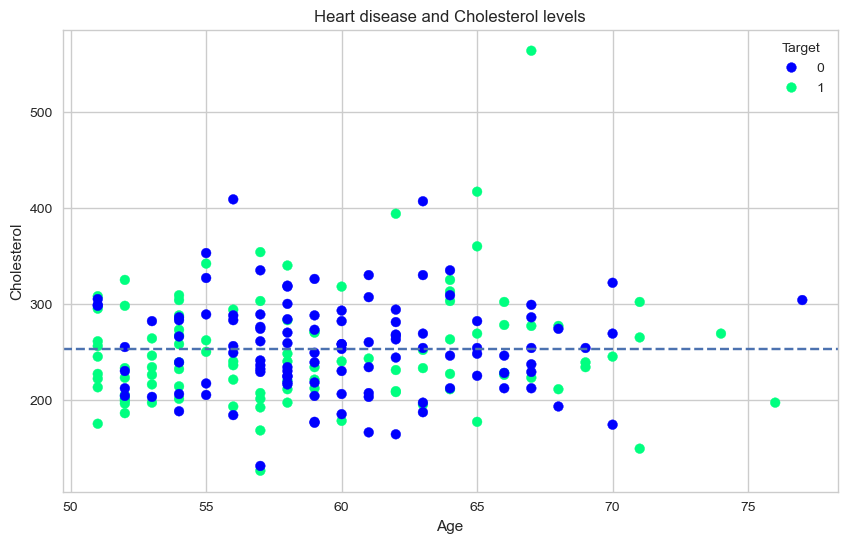

In [33]:
plt.style.use('seaborn-v0_8-whitegrid')
# Creating base plot
fig, ax = plt.subplots(figsize=(10, 6))

# Creating plots
scatter = ax.scatter(
    x=over_50['age'],
    y=over_50['chol'],
    c=over_50['target'],
    cmap='winter',
)

# Setting title and labels
ax.set(
    title='Heart disease and Cholesterol levels',
    xlabel='Age',
    ylabel='Cholesterol',
)

# Adding legend
ax.legend(*scatter.legend_elements(), title='Target')

# Adding horizontal line
ax.axhline(over_50['chol'].mean(), linestyle='--')

(60.0, 200.0)

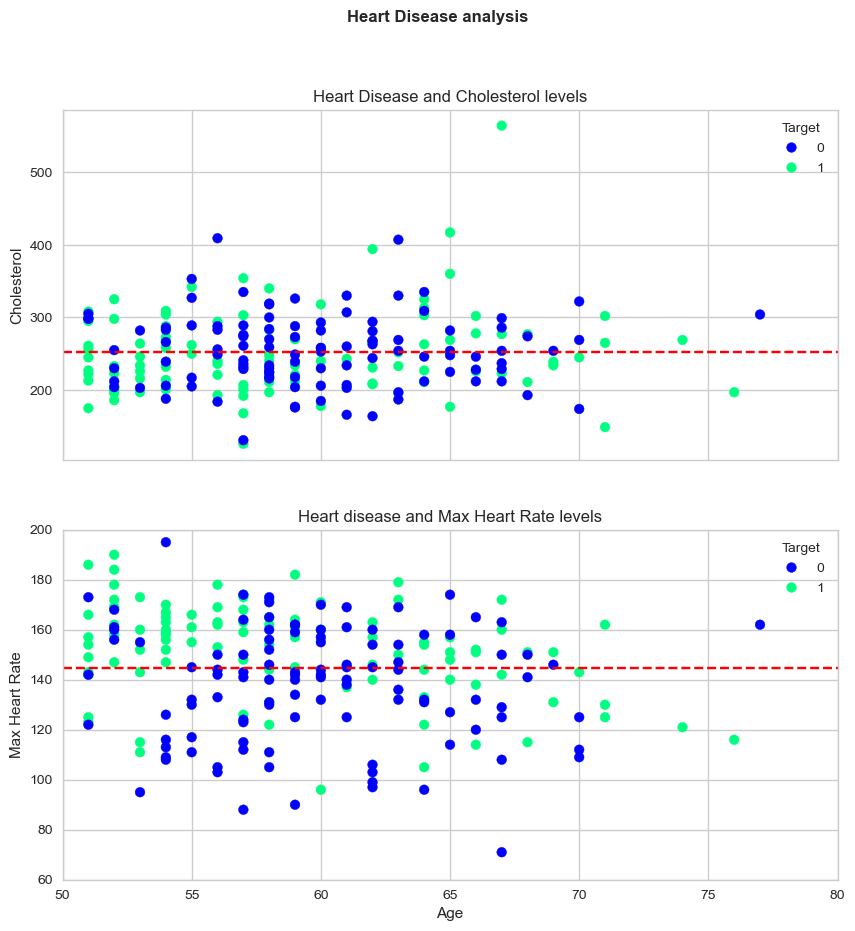

In [42]:
# Subplot of chol, age, thalcah
fig, (ax0, ax1) = plt.subplots(
    figsize=(10, 10),
    nrows=2,
    ncols=1,
    sharex=True,
)

# Adding data to ax0
scatter = ax0.scatter(
    x=over_50['age'],
    y=over_50['chol'],
    c=over_50['target'],
    cmap='winter',
)

# Customize ax0
ax0.set(
    title='Heart Disease and Cholesterol levels',
    # xlabel='Age',
    ylabel='Cholesterol',
)

## Add a legend
ax0.legend(*scatter.legend_elements(), title='Target')

## Add horizontal line
ax0.axhline(
    over_50['chol'].mean(),
    linestyle='--',
    color='red',
)

## Adding data to ax1
scatter = ax1.scatter(
    x=over_50['age'],
    y=over_50['thalach'],
    c=over_50['target'],
    cmap='winter',
)

# Customizing ax1
ax1.set(
    title='Heart disease and Max Heart Rate levels',
    xlabel='Age',
    ylabel='Max Heart Rate',
)

## Adding legend
ax1.legend(*scatter.legend_elements(), title='Target')

## Adding horizontal line
ax1.axhline(
    over_50['thalach'].mean(),
    linestyle='--',
    color='red',
)

## Adding a title to the figure
fig.suptitle('Heart Disease analysis', fontweight='bold')

# Limiting the axis
ax0.set_xlim([50, 80])
ax1.set_ylim([60, 200])